# M. Sc. Project 
- #### Name: Vishal Rathour
- #### Roll No.: M22PH016
- #### Title : Investigation of micron sized particle via light scattering method using Machine Learning
- #### Supervisor : Dr. V. Narayanan


# **Investigation of micron sized particle via light scattering method using Machine Learning**

---

## Experimental setup for Mie Scattering of light from micron sized particles
---


In [1]:
from IPython.display import display, Image
image_url = 'https://europepmc.org/articles/PMC5804501/bin/nihms-761416-f0001.jpg'

# Display the image
display(Image(url=image_url))

In [2]:
# Install the library of calculating Mie Scattering Intensity
!pip install PyMieScatt


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\Asus\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [1]:
# Import the libraries
import PyMieScatt as ps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



---
# **ML Implementation**
### For the different size combinations of same size particles

---




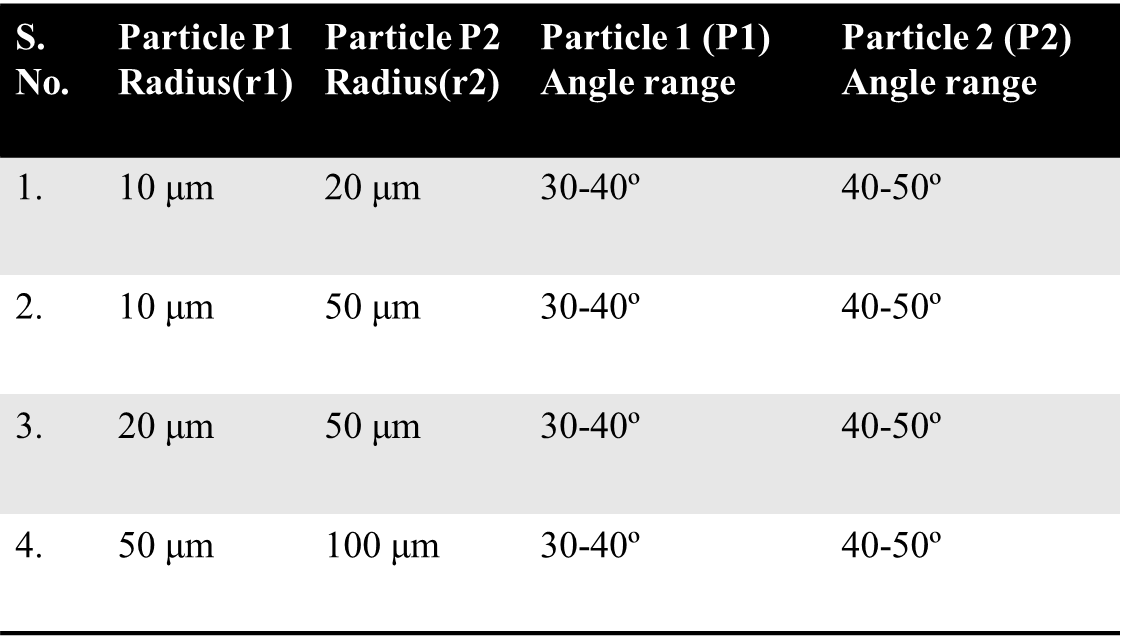

## Case 1

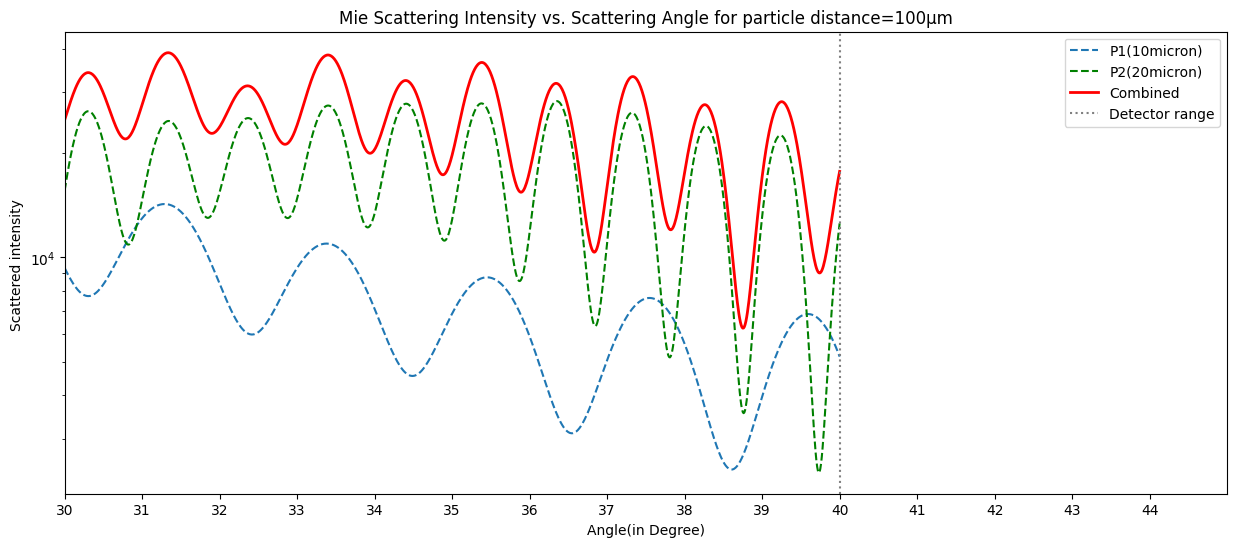

In [2]:
# Import the libraries
import PyMieScatt as ps
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
m = 1.33257 + 1.67e-8j  # refractive index
wavelength = 632  # nm

r1 = 10  # microns
r2 = 20  # microns

diameter1 = 2 * r1 * 1000  # nm
diameter2 = 2 * r2 * 1000  # nm

distance = 100 #micron


'''
The distance b/w the particle p1 & p2 is 100 microns and the corresponding shift in the angle for detector is 10 deg 
Detector range is 10 deg
For p1 angle range 30-40
For p2 angle range 40-50
'''


theta1, SL1, SR1, SU1 = ps.ScatteringFunction(m, wavelength, diameter1,
                    nMedium=1.0, minAngle=30, maxAngle=40, angularResolution=0.01,
                    space='theta', angleMeasure='radians', normalization=None)

theta2, SL2, SR2, SU2 = ps.ScatteringFunction(m, wavelength, diameter2,
                    nMedium=1.0, minAngle=40, maxAngle=50, angularResolution=0.01,
                    space='theta', angleMeasure='radians', normalization=None)

theta_deg1 = theta1*(180/np.pi)
theta_deg2 = theta2*(180/np.pi)

plt.figure(figsize=(15,6))
plt.semilogy(theta_deg1, SL1, label=f'P1({r1}micron)',ls='--' )
plt.semilogy(theta_deg1, SL2, label=f'P2({r2}micron)',c='g',ls='--')
plt.semilogy(theta_deg1, SL1+SL2, label='Combined',c='red',lw=2)
plt.axvline(x=40, label='Detector range', ls='dotted', c='gray')
plt.xticks(np.arange(30, 45, 1))
plt.xlim(30, 45)
plt.xlabel('Angle(in Degree)')
plt.ylabel('Scattered intensity ')
plt.title(f'Mie Scattering Intensity vs. Scattering Angle for particle distance={distance}μm')
plt.legend()
plt.show()

## **Creating the dataframe to apply Machine Learning models**

In [3]:
import pandas as pd

# here r1 = radius of first particle = 10 micron
# here r2 = radius of first particle = 20 micron
# here res = resultant of all two particle intensities

df1 = pd.DataFrame({
    'theta_deg': theta_deg1,
    'I': SL1,
    'r': 'p1',})

df2 = pd.DataFrame({
    'theta_deg': theta_deg1,
    'I': SL2,
    'r': 'p2',})

df3 = pd.DataFrame({
    'theta_deg': theta_deg1,
    'I': SL1+SL2,
    'r': 'res',})

df_10_20 = pd.concat([df1, df2, df3], axis=0, ignore_index=True)
df_10_20

,theta_deg,I,r
0,30.00,9327.276561,p1
1,30.01,9229.598561,p1
2,30.02,9134.466893,p1
3,30.03,9041.956589,p1
4,30.04,8952.140147,p1
...,...,...,...
2998,39.96,15806.118913,res
2999,39.97,16288.445994,res
3000,39.98,16768.454622,res
3001,39.99,17243.798491,res


In [7]:
# df.to_csv('Dataframe used for ML')

#### Try using several models to check which one is giving best accuracy on classification prediction

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Split the dataset into features (X) and labels (y)
X = df_10_20.iloc[:, :-1]  # Features: theta_deg and I
y = df_10_20.iloc[:, -1]   # Labels: r

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Print accuracy results
for name, accuracy in results.items():
    print(f"{name}: {accuracy}")

Logistic Regression: 0.6672212978369384
Decision Tree: 0.9517470881863561
Random Forest: 0.9467554076539102
AdaBoost: 0.5840266222961731
Gradient Boosting: 0.8901830282861897
K-Nearest Neighbors: 0.670549084858569
Naive Bayes: 0.697171381031614
Support Vector Machine: 0.6888519134775375


Now as we see that Random forest is giving best accuracy so we will use this model for our further uses

## **Random Forest Implementation**

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the dataset into features (X) and labels (y)
X = df_10_20.iloc[:, :-1]  # Features: theta_deg and I
y = df_10_20.iloc[:, -1]   # Labels: r

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest model
random_forest = RandomForestClassifier()

# Train the Random Forest model
random_forest.fit(X_train, y_train)

# Predict using the Random Forest model
y_pred = random_forest.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy result
print("Random Forest Accuracy: {:.2f}%".format(accuracy * 100))

Random Forest Accuracy: 94.51%


## Case 2

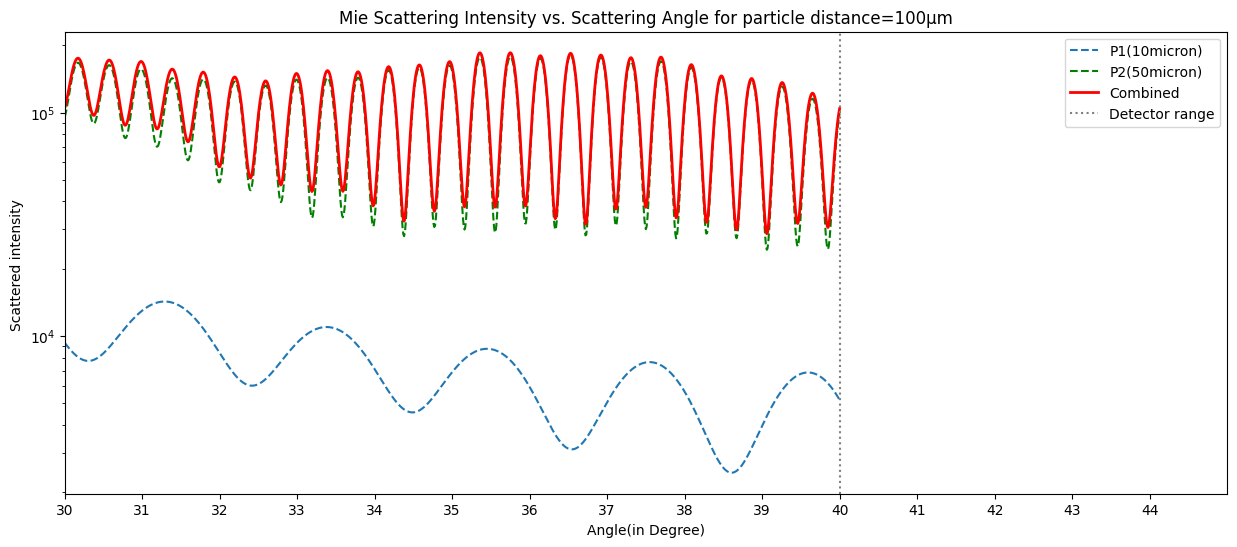

In [6]:
# Import the libraries
import PyMieScatt as ps
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
m = 1.33257 + 1.67e-8j  # refractive index
wavelength = 632  # nm

r1 = 10  # microns
r2 = 50  # microns

diameter1 = 2 * r1 * 1000  # nm
diameter2 = 2 * r2 * 1000  # nm

distance = 100 #micron


'''
The distance b/w the particle p1 & p2 is 100 microns and the corresponding shift in the angle for detector is 10 deg 
Detector range is 10 deg
For p1 angle range 30-40
For p2 angle range 40-50
'''


theta1, SL1, SR1, SU1 = ps.ScatteringFunction(m, wavelength, diameter1,
                    nMedium=1.0, minAngle=30, maxAngle=40, angularResolution=0.01,
                    space='theta', angleMeasure='radians', normalization=None)

theta2, SL2, SR2, SU2 = ps.ScatteringFunction(m, wavelength, diameter2,
                    nMedium=1.0, minAngle=40, maxAngle=50, angularResolution=0.01,
                    space='theta', angleMeasure='radians', normalization=None)

theta_deg1 = theta1*(180/np.pi)
theta_deg2 = theta2*(180/np.pi)

plt.figure(figsize=(15,6))
plt.semilogy(theta_deg1, SL1, label=f'P1({r1}micron)',ls='--' )
plt.semilogy(theta_deg1, SL2, label=f'P2({r2}micron)',c='g',ls='--')
plt.semilogy(theta_deg1, SL1+SL2, label='Combined',c='red',lw=2)
plt.axvline(x=40, label='Detector range', ls='dotted', c='gray')
plt.xticks(np.arange(30, 45, 1))
plt.xlim(30, 45)
plt.xlabel('Angle(in Degree)')
plt.ylabel('Scattered intensity ')
plt.title(f'Mie Scattering Intensity vs. Scattering Angle for particle distance={distance}μm')
plt.legend()
plt.show()

In [7]:
df1 = pd.DataFrame({
    'theta_deg': theta_deg1,
    'I': SL1,
    'r': 'p1',})

df2 = pd.DataFrame({
    'theta_deg': theta_deg1,
    'I': SL2,
    'r': 'p2',})

df3 = pd.DataFrame({
    'theta_deg': theta_deg1,
    'I': SL1+SL2,
    'r': 'res',})

df_10_50= pd.concat([df1, df2, df3], axis=0, ignore_index=True)
df_10_50

,theta_deg,I,r
0,30.00,9327.276561,p1
1,30.01,9229.598561,p1
2,30.02,9134.466893,p1
3,30.03,9041.956589,p1
4,30.04,8952.140147,p1
...,...,...,...
2998,39.96,82086.221996,res
2999,39.97,88426.257322,res
3000,39.98,94328.623407,res
3001,39.99,99638.823365,res


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Split the dataset into features (X) and labels (y)
X = df_10_50.iloc[:, :-1]  # Features: theta_deg and I
y = df_10_50.iloc[:, -1]   # Labels: r

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Print accuracy results
for name, accuracy in results.items():
    print(f"{name}: {accuracy}")

Logistic Regression: 0.6788685524126455
Decision Tree: 0.6838602329450915
Random Forest: 0.562396006655574
AdaBoost: 0.6589018302828619
Gradient Boosting: 0.6622296173044925
K-Nearest Neighbors: 0.7121464226289518
Naive Bayes: 0.6672212978369384
Support Vector Machine: 0.6638935108153078


## **K-Nearest Neighbors Implementation**

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split the dataset into features (X) and labels (y)
X = df_10_50.iloc[:, :-1]  # Features: theta_deg and I
y = df_10_50.iloc[:, -1]   # Labels: r

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN model
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train, y_train)

# Predict labels for test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("K-Nearest Neighbors Accuracy: {:.2f}%".format(accuracy * 100))

K-Nearest Neighbors Accuracy: 71.21%


## Case 3

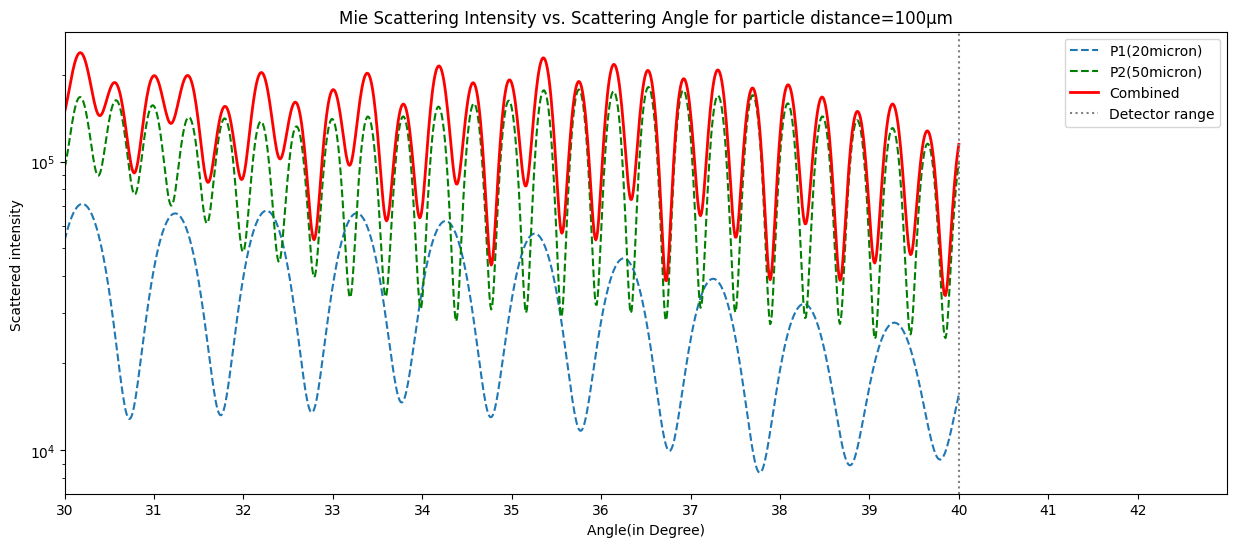

In [17]:
# Import the libraries
import PyMieScatt as ps
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
m = 1.33257 + 1.67e-8j  # refractive index
wavelength = 632  # nm

r1 = 20  # microns
r2 = 50  # microns

diameter1 = 2 * r1 * 1000  # nm
diameter2 = 2 * r2 * 1000  # nm

distance = 100 #micron


'''
The distance b/w the particle p1 & p2 is 100 microns and the corresponding shift in the angle for detector is 10 deg 
Detector range is 10 deg
For p1 angle range 30-40
For p2 angle range 40-50
'''


theta1, SL1, SR1, SU1 = ps.ScatteringFunction(m, wavelength, diameter1,
                    nMedium=1.0, minAngle=30, maxAngle=40, angularResolution=0.01,
                    space='theta', angleMeasure='radians', normalization=None)

theta2, SL2, SR2, SU2 = ps.ScatteringFunction(m, wavelength, diameter2,
                    nMedium=1.0, minAngle=40, maxAngle=50, angularResolution=0.01,
                    space='theta', angleMeasure='radians', normalization=None)

theta_deg1 = theta1*(180/np.pi)
theta_deg2 = theta2*(180/np.pi)

plt.figure(figsize=(15,6))
plt.semilogy(theta_deg1, SL1, label=f'P1({r1}micron)',ls='--' )
plt.semilogy(theta_deg1, SL2, label=f'P2({r2}micron)',c='g',ls='--')
plt.semilogy(theta_deg1, SL1+SL2, label='Combined',c='red',lw=2)
plt.axvline(x=40, label='Detector range', ls='dotted', c='gray')
plt.xticks(np.arange(30, 43, 1))
plt.xlim(30, 43)
plt.xlabel('Angle(in Degree)')
plt.ylabel('Scattered intensity ')
plt.title(f'Mie Scattering Intensity vs. Scattering Angle for particle distance={distance}μm')
plt.legend()
plt.show()

In [18]:
df1 = pd.DataFrame({
    'theta_deg': theta_deg1,
    'I': SL1,
    'r': 'p1',})

df2 = pd.DataFrame({
    'theta_deg': theta_deg1,
    'I': SL2,
    'r': 'p2',})

df3 = pd.DataFrame({
    'theta_deg': theta_deg1,
    'I': SL1+SL2,
    'r': 'res',})

df_20_50 = pd.concat([df1, df2, df3], axis=0, ignore_index=True)
df_20_50

,theta_deg,I,r
0,30.00,53289.263386,p1
1,30.01,54867.943437,p1
2,30.02,56403.191223,p1
3,30.03,57889.305368,p1
4,30.04,59320.771536,p1
...,...,...,...
2998,39.96,90285.997519,res
2999,39.97,97160.882982,res
3000,39.98,103612.716842,res
3001,39.99,109485.101132,res


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Split the dataset into features (X) and labels (y)
X = df_20_50.iloc[:, :-1]  # Features: theta_deg and I
y = df_20_50.iloc[:, -1]   # Labels: r

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Print accuracy results
for name, accuracy in results.items():
    print(f"{name}: {accuracy}")

Logistic Regression: 0.5740432612312812
Decision Tree: 0.8019966722129783
Random Forest: 0.7520798668885191
AdaBoost: 0.5757071547420965
Gradient Boosting: 0.7071547420965059
K-Nearest Neighbors: 0.5856905158069884
Naive Bayes: 0.6156405990016639
Support Vector Machine: 0.6189683860232945


## **Decision Tree Implementation**

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming df_20_50 is your DataFrame containing the dataset

# Split the dataset into features (X) and labels (y)
X = df_20_50.iloc[:, :-1]  # Features: theta_deg and I
y = df_20_50.iloc[:, -1]   # Labels: r

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree model
decision_tree = DecisionTreeClassifier()

# Train the model
decision_tree.fit(X_train, y_train)

# Predict labels for test set
y_pred = decision_tree.predict(X_test)

# Print accuracy result
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy: {:.2f}%".format(accuracy * 100))

Decision Tree Accuracy: 79.70%


## Case 4

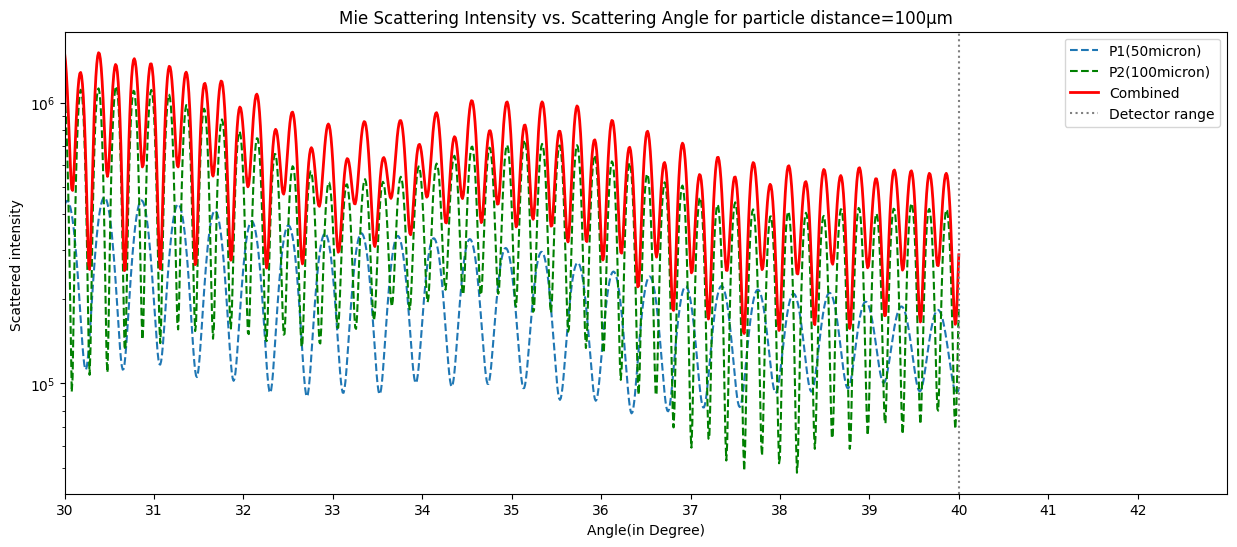

In [27]:
# Import the libraries
import PyMieScatt as ps
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
m = 1.33257 + 1.67e-8j  # refractive index
wavelength = 632  # nm

r1 = 50  # microns
r2 = 100  # microns

diameter1 = 2 * r1 * 1000  # nm
diameter2 = 2 * r2 * 1000  # nm

distance = 100 #micron


'''
The distance b/w the particle p1 & p2 is 20microns and the corresponding shift in the angle for detector is 2 deg 
Detector range is 10 deg
For p1 angle range 30-40
For p2 angle range 40-50
'''


theta1, SL1, SR1, SU1 = ps.ScatteringFunction(m, wavelength, diameter1,
                    nMedium=1.0, minAngle=30, maxAngle=40, angularResolution=0.01,
                    space='theta', angleMeasure='radians', normalization=None)

theta2, SL2, SR2, SU2 = ps.ScatteringFunction(m, wavelength, diameter2,
                    nMedium=1.0, minAngle=40, maxAngle=50, angularResolution=0.01,
                    space='theta', angleMeasure='radians', normalization=None)

theta_deg1 = theta1*(180/np.pi)
theta_deg2 = theta2*(180/np.pi)

plt.figure(figsize=(15,6))
plt.semilogy(theta_deg1, SL1, label=f'P1({r1}micron)',ls='--' )
plt.semilogy(theta_deg1, SL2, label=f'P2({r2}micron)',c='g',ls='--')
plt.semilogy(theta_deg1, SL1+SL2, label='Combined',c='red',lw=2)
plt.axvline(x=40, label='Detector range', ls='dotted', c='gray')
plt.xticks(np.arange(30, 43, 1))
plt.xlim(30, 43)
plt.xlabel('Angle(in Degree)')
plt.ylabel('Scattered intensity ')
plt.title(f'Mie Scattering Intensity vs. Scattering Angle for particle distance={distance}μm')
plt.legend()
plt.show()

In [28]:
df1 = pd.DataFrame({
    'theta_deg': theta_deg1,
    'I': SL1,
    'r': 'p1',})

df2 = pd.DataFrame({
    'theta_deg': theta_deg1,
    'I': SL2,
    'r': 'p2',})

df3 = pd.DataFrame({
    'theta_deg': theta_deg1,
    'I': SL1+SL2,
    'r': 'res',})

df_50_100 = pd.concat([df1, df2, df3], axis=0, ignore_index=True)
df_50_100

,theta_deg,I,r
0,30.00,430944.983768,p1
1,30.01,440175.731441,p1
2,30.02,445720.802993,p1
3,30.03,447455.797607,p1
4,30.04,445342.696659,p1
...,...,...,...
2998,39.96,162381.962600,res
2999,39.97,169057.892485,res
3000,39.98,194003.992708,res
3001,39.99,234769.916187,res


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Split the dataset into features (X) and labels (y)
X = df_50_100.iloc[:, :-1]  # Features: theta_deg and I
y = df_50_100.iloc[:, -1]   # Labels: r

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Print accuracy results
for name, accuracy in results.items():
    print(f"{name}: {accuracy}")

Logistic Regression: 0.34775374376039936
Decision Tree: 0.64891846921797
Random Forest: 0.6755407653910149
AdaBoost: 0.5723793677204659
Gradient Boosting: 0.670549084858569
K-Nearest Neighbors: 0.540765391014975
Naive Bayes: 0.5690515806988353
Support Vector Machine: 0.5740432612312812


## **Random Forest Implementation**

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the dataset into features (X) and labels (y)
X = df_50_100.iloc[:, :-1]  # Features: theta_deg and I
y = df_50_100.iloc[:, -1]   # Labels: r

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=63)

# Initialize Random Forest model
random_forest = RandomForestClassifier()

# Train the Random Forest model
random_forest.fit(X_train, y_train)

# Predict using the Random Forest model
y_pred = random_forest.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy result
print("Random Forest Accuracy: {:.2f}%".format(accuracy * 100))

Random Forest Accuracy: 67.05%
